In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pandas.core.frame import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, roc_auc_score, accuracy_score
from matplotlib.pyplot import MultipleLocator

In [2]:
df = pd.read_excel('emotion_part.xlsx')
#处理verified部分，均值
verified = df['verified (F=0, T=1)']
for i in range(0,22155):
    if len(str(verified[i])) > 1:
        try:
            a = verified[i].replace('True','1').replace('None','0').replace('Non','0').replace('No','0').replace('N','0').replace('False','0').replace('Fals','0').replace('Fal','0').replace('Fa','0').replace('F','0').replace('','0').split(',')
            a_map = map(float,a)
            a_map = list(a_map)
            a_map = np.array(a_map)
            a_mean = np.mean(a_map)
            verified[i] = a_mean
        except Exception as e:
            continue

df.to_excel('emotion_part_2.xlsx')

In [41]:
#测试块
a = verified[18877].replace('None','0').replace('False','0').replace('Fals','0').replace('Fal','0').replace('Fa','0').replace('F','0').replace('','0').split(',')
a_map = list(map(float,a))
a_map = np.array(a_map)
a_mean = np.mean(a_map)
a_mean

0.0

In [13]:
df_raw = pd.read_excel('metadata2.xlsx')
verified_list = df_raw['verified_list']

for i in range(0,126301):
    verified_list[i] = verified_list[i].replace('True','1').replace('None','0').replace('False','0')

type(verified_list[0])

str

In [19]:
#处理metadata_verified部分，均值
for i in range(0,126301):
    if len(str(verified_list[i])) > 1:
        try:
            b = verified_list[i].replace('Fals','0').replace('Fal','0').replace('Fa','0').replace('F','0').replace('','0').split(',')
            b_map = map(float,b)
            b_map = list(b_map)
            b_map = np.array(b_map)
            b_mean = np.mean(b_map)
            verified_list[i] = b_mean
        except Exception as e:
            continue

df_raw.to_excel('metadata3.xlsx')

In [65]:
#处理engagement_list，中位数
engagement_list = df_raw['engagement_list']
for i in range(0,126301):
    engagement_list[i] = engagement_list[i].split(',')


for i in range(0,126301):
    try:
        test_data = engagement_list[i]
        test_data = list(map(float,test_data))
        test_data = np.array(test_data).reshape(-1, 1)
        test_data_mid = np.median(test_data)
        engagement_list[i] = test_data_mid
    except Exception as e:
        continue

df_raw.to_excel('metadata3.xlsx')

In [8]:
df_raw = pd.read_excel('metadata3.xlsx')

followees=df_raw['num_followees_list']
followers=df_raw['num_followers_list']
age=df_raw['account_age_list']
followees[8124]

'0,1631,1188,5248,789,741,4993,302,368,229,6,654,93,2000,569,3322,2014,1051,2648,264,605,926,1373,1015,263,957,258,1013,302,194,2006,2213,898,441,1700,270,1890,46,7878,2153,499,497,929,493,178,2306,1047,1791,269,11,643,763,453,649,1537,267,512'

In [9]:
#处理followee部分，中位值
for i in range(0,126301):
    test_data = followees[i].replace('None','').replace('Non','').replace('No','').replace('N','').split(',')
    test_data = [a for a in test_data if a != '']
    data = []
    for x in test_data:
        data.append(float(x))
    data = np.array(data).reshape(-1, 1)
    data = np.median(data)
    followees[i] = data

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
#处理follower, age部分，中位值
for i in range(0,126301):
    test_data2 = followers[i].replace('None','').replace('Non','').replace('No','').replace('N','').split(',')
    test_data3 = age[i].replace('None','').replace('Non','').replace('No','').replace('N','').split(',')
    test_data2 = [a1 for a1 in test_data2 if a1 != '']
    test_data3 = [a2 for a2 in test_data3 if a2 != '']
    data2 = []
    data3 = []
    for x1 in test_data2:
        data2.append(float(x1))
    for x2 in test_data3:
        data3.append(float(x2))
    data2 = np.array(data2).reshape(-1, 1)
    data2 = np.median(data2)
    followers[i] = data2
    data3 = np.array(data3).reshape(-1, 1)
    data3 = np.median(data3)
    age[i] = data3
df_raw.to_excel('metadata4.xlsx')

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
df_raw = pd.read_excel('metadata4.xlsx')

df_c = pd.get_dummies(df_raw['rumor_category'])
df_c

,Business,Entertainment,NaturalDisasters,Politics,Science/Nature/Tech/Food/Health,ViralPhotos/Stories/UrbanLegends,War/Terrorism/Shootings
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
126296,0,0,0,1,0,0,0
126297,0,0,0,1,0,0,0
126298,0,0,0,0,0,0,1
126299,0,0,0,0,0,1,0


In [39]:
#处理categories部分
df_raw['Politics'] = df_c['Politics']
df_raw['Business'] = df_c['Business']
df_raw['Entertainment'] = df_c['Entertainment']
df_raw['NaturalDisasters'] = df_c['NaturalDisasters']
df_raw['Science/Nature/Tech/Food/Health'] = df_c['Science/Nature/Tech/Food/Health']
df_raw['ViralPhotos/Stories/UrbanLegends'] = df_c['ViralPhotos/Stories/UrbanLegends']
df_raw['War/Terrorism/Shootings'] = df_c['War/Terrorism/Shootings']
df_raw.to_excel('metadata4.xlsx')

In [29]:
#处理时间部分
df_raw = pd.read_excel('metadata4.xlsx')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126301 entries, 0 to 126300
Data columns (total 28 columns):
Unnamed: 0                          126301 non-null int64
raw_id                              126301 non-null int64
tid                                 126301 non-null int64
rumor_id                            126301 non-null object
virality                            126301 non-null float64
verified_list                       126301 non-null float64
veracity (0=0, 1=1, 2=2)            126301 non-null int64
num_followees_list                  126301 non-null float64
num_followers_list                  126301 non-null float64
engagement_list                     126301 non-null object
account_age_list                    126301 non-null float64
depth2time                          42081 non-null object
depth2uu                            42081 non-null object
depth2breadth                       42081 non-null object
uu2time                             126301 non-null object
depth 

In [30]:
df_raw.date = pd.to_datetime(df_raw.date)

In [35]:
months = df_raw.date.dt.month
day_of_months = df_raw.date.dt.day
hours = df_raw.date.dt.hour
#时间段特征
def daypart(hour):
    if hour in [2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13]:
        return "noon"
    elif hour in [14,15,16,17]:
        return "afternoon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"
raw_dayparts = hours.apply(daypart)
dayparts = pd.get_dummies(raw_dayparts)
dayparts = dayparts[['dawn','morning','noon','afternoon','evening','midnight']]
df_raw['dawn'] = dayparts['dawn']
df_raw['morning'] = dayparts['morning']
df_raw['noon'] = dayparts['noon']
df_raw['afternoon'] = dayparts['afternoon']
df_raw['evening'] = dayparts['evening']
df_raw['midnight'] = dayparts['midnight']
dayparts

,dawn,morning,noon,afternoon,evening,midnight
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
126296,0,1,0,0,0,0
126297,0,0,0,1,0,0
126298,0,0,0,1,0,0
126299,0,1,0,0,0,0


In [37]:
#星期特征
to_one_hot = df_raw.date.dt.day_name()
days = pd.get_dummies(to_one_hot)
df_raw['Monday'] = days['Monday']
df_raw['Tuesday'] = days['Tuesday']
df_raw['Wednesday'] = days['Wednesday']
df_raw['Thursday'] = days['Thursday']
df_raw['Friday'] = days['Friday']
df_raw['Saturday'] = days['Saturday']
df_raw['Sunday'] = days['Sunday']
days

df_raw.to_excel('metadata5.xlsx')

In [186]:
# perhaps wrong_sum depth to XX
df_raw = pd.read_excel('metadata5.xlsx')

depth2uu = df_raw['depth2uu']
depth = df_raw['depth']
depth2time = df_raw['depth2time']
depth2breadth = df_raw['depth2breadth']


df_raw['sum_depth2uu'] = ''
sum_depth2uu = df_raw['sum_depth2uu']
df_raw['sum_depth2time'] = ''
df_raw['sum_depth2breadth'] = ''
sum_depth2time = df_raw['sum_depth2time']
sum_depth2breadth = df_raw['sum_depth2breadth']

for i in range(0,126301):
    n = depth[i]
    if n < 1:
        sum_depth2uu[i] = 0
        sum_depth2time[i] = 0
        sum_depth2breadth[i] = 0
    if n >= 1:
        nparray = np.array(depth2uu[i].replace(',',':').split(':'))
        nparray = nparray.astype(np.float).tolist()
        sum_depth2uu[i]= sum(nparray) - (n * (1 + n) / 2)
        nparray_1 = np.array(depth2time[i].replace(',',':').split(':'))
        nparray_1 = nparray_1.astype(np.float).tolist()
        sum_depth2time[i]= sum(nparray_1) - (n * (1 + n) / 2)
        nparray_2 = np.array(depth2breadth[i].replace(',',':').split(':'))
        nparray_2 = nparray_2.astype(np.float).tolist()
        sum_depth2breadth[i]= sum(nparray_2) - (n * (1 + n) / 2)

df_raw.to_excel('metadata6.xlsx')

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a 

In [187]:
df_raw = pd.read_excel('metadata6.xlsx')
uu2time = df_raw['uu2time']
unique_users = df_raw['unique_users']
df_raw['sum_uu2time']=''
sum_uu2time = df_raw['sum_uu2time']

In [196]:
#X
for i in range(0,126301):
    n = unique_users[i]
    if n < 2:
        sum_uu2time[i] = 0
    if n >= 2:
        try:
            nparray_3 = np.array(uu2time[i].replace(',',':').split(':'))
            nparray_3 = nparray_3.astype(np.float).tolist()
            sum_uu2time[i]= sum(nparray_3) - (n * (1 + n) / 2)
        except Exception as e:
            continue
df_raw.to_excel('metadata7.xlsx')

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [195]:
n = unique_users[9439]
nparray_3 = np.array(uu2time[9439].replace(',',':').split(':'))
nparray_3 = nparray_3.astype(np.float).tolist()
sum_uu2time_1 = sum(nparray_3) - (n * (1 + n) / 2)
uu2time[9439].replace(',',':').split(':')

['1', '0.0', '2', '225.0', '3', '260.0']

In [69]:
df_raw = pd.read_excel('metadata8.xlsx')
df_raw.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'raw_id', 'tid', 'rumor_id', 'virality',
       'verified_list', 'veracity (0=0, 1=1, 2=2)', 'num_followees_list',
       'num_followers_list', 'engagement_list', 'account_age_list',
       'depth2time', 'depth2uu', 'depth2breadth', 'uu2time', 'depth',
       'unique_users', 'max_breadth', 'start_date', 'date', 'size', 'Business',
       'Politics', 'Entertainment', 'NaturalDisasters',
       'Science/Nature/Tech/Food/Health', 'ViralPhotos/Stories/UrbanLegends',
       'War/Terrorism/Shootings', 'dawn', 'morning', 'noon', 'afternoon',
       'evening', 'midnight', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'sum_depth2uu', 'sum_depth2time',
       'sum_depth2breadth', 'sum_uu2time', 'max_depthtime'],
      dtype='object')

In [70]:
uutime = df_raw['uu2time']
df_raw['max_uutime']=''
max_uutime = df_raw['max_uutime']
for i in range(0,126301):
    max_uutime[i] = uutime[i].split(':')[len(uutime[i].split(':'))-1]
max_uutime

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126296    0.0
126297    0.0
126298    0.0
126299    0.0
126300    0.0
Name: max_uutime, Length: 126301, dtype: object

In [71]:
df_raw.to_excel('metadata9.xlsx')

In [17]:
depthtime = df_raw['depth2time']
df_raw['max_depthtime']=''
max_depthtime = df_raw['max_depthtime']
for i in range(0,126301):
    try:
        max_depthtime[i] = str(depthtime[i]).split(':')[len(depthtime[i].split(':'))-1]
    except Exception as e:
        continue
max_depthtime[8143:8165]

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


8143     36143.0
8144      5360.0
8145      2494.0
8146     19949.0
8147            
8148      1352.0
8149      1554.0
8150    152114.0
8151      1917.0
8152      1088.0
8153    185999.0
8154     68905.0
8155      4105.0
8156     67563.0
8157    106395.0
8158            
8159      3728.0
8160       445.0
8161     41113.0
8162       294.0
8163     34319.0
8164       775.0
Name: max_depthtime, dtype: object

In [23]:
df_raw.to_excel('metadata8.xlsx')

In [54]:
#数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_data = list(map(float,test_data))
test_data = np.array(test_data).reshape(-1, 1)
scaler = scaler.fit(test_data)
result = scaler.transform(test_data)
result

array([[0.]])

In [51]:
#数据标准化
from sklearn.preprocessing import StandardScaler
test_data = list(map(float,test_data))
test_data = np.array(test_data).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(test_data)
data_std = scaler.transform(test_data)
data_std

array([[0.]])

In [82]:
#重新处理uu2time
import xlwt 
wb = xlwt.Workbook(encoding='utf-8')
ws = wb.add_sheet('Sheet1') #sheet页第一页
f = open('metadata_anon_2.txt', encoding='gbk') 
 
row_excel = 0
a = []

for line in f:
    #line = line.strip('\n') #去掉换行符
    line = line.split('@') #每一行以"+"分隔
    a.append(line[11])

df_raw['max_uutime']=''
max_uutime = df_raw['max_uutime']
for i in range(0,126301):
    max_uutime[i] = a[i].split(':')[len(a[i].split(':'))-1]
max_uutime

df_raw.to_excel('metadata9.xlsx')

In [2]:
df_raw = pd.read_excel('metadata10.xlsx')

In [28]:
#PCA降维
X = df_raw[[#'max_uutime'
            #,'max_depthtime'
            'Business', 'Politics', 'Entertainment','NaturalDisasters', 'Science/Nature/Tech/Food/Health','ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings'
            #, 'dawn', 'morning', 'noon', 'afternoon', 'evening', 'midnight'
            #, 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
            #, 'verified_list','veracity (0=0, 1=1, 2=2)'
            #, 'num_followees_list'
            #, 'num_followers_list'
            #,'account_age_list'
           #,'virality'
           #,'depth'
           #,'max_breadth'
           ]]#virality>max breadth>depth>>others
y = df_raw['size']
#pd.DataFrame(X)
pca = PCA(n_components='mle')#mle:自动选取最好取值
pca = pca.fit(X)
X_dr = pca.transform(X)

X_dr

array([[-0.69450612, -0.21476804,  0.02132849, -0.01603382, -0.02046589,
        -0.00490766],
       [-0.69450612, -0.21476804,  0.02132849, -0.01603382, -0.02046589,
        -0.00490766],
       [-0.69450612, -0.21476804,  0.02132849, -0.01603382, -0.02046589,
        -0.00490766],
       ...,
       [ 0.15788681,  0.4376133 , -0.24657585,  0.85690543, -0.13805072,
        -0.01915638],
       [ 0.69453567, -0.47966342,  0.03569566, -0.02575214, -0.02990031,
        -0.00677426],
       [ 0.15788681,  0.4376133 , -0.24657585,  0.85690543, -0.13805072,
        -0.01915638]])

In [30]:
pca.explained_variance_ratio_.sum()#保留了多少特征

0.9999999999999999

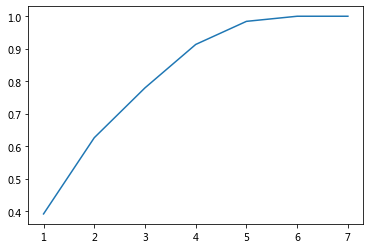

In [25]:
pca_line = PCA().fit(X)
plt.plot([1,2,3,4,5,6,7],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4,5,6,7])
plt.show()

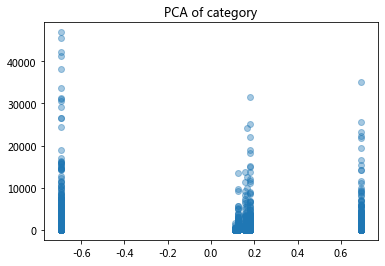

In [17]:
plt.figure()
plt.scatter(X_dr,y
            ,alpha=0.4
           )
plt.title('PCA of category')
#plt.xscale('log')
plt.show()

In [38]:
X = df_raw[[#'max_uutime'
            #,'max_depthtime'
            #'Business', 'Politics', 'Entertainment','NaturalDisasters', 'Science/Nature/Tech/Food/Health','ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings'
             'dawn', 'morning', 'noon', 'afternoon', 'evening', 'midnight'
            , 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
            #, 'verified_list','veracity (0=0, 1=1, 2=2)'
            #, 'num_followees_list'
            #, 'num_followers_list'
            #,'account_age_list'
           #,'virality'
           #,'depth'
           #,'max_breadth'
           ]]#virality>max breadth>depth>>others
y = df_raw['size']
#pd.DataFrame(X)
pca = PCA(n_components=1)
#pca = PCA(n_components=0.97,svd_solver='auto')#自动选取可解释性在97%的
pca = pca.fit(X)
X_dr = pca.transform(X)
X_dr

array([[-0.34119722],
       [ 0.74626389],
       [ 0.76606715],
       ...,
       [ 0.83427617],
       [-0.13024315],
       [-0.47218103]])

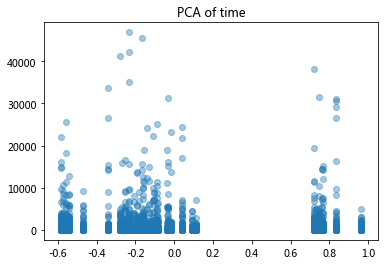

In [39]:
plt.figure()
plt.scatter(X_dr,y
            ,alpha=0.4
           )
plt.title('PCA of time')
#plt.xscale('log')
plt.show()

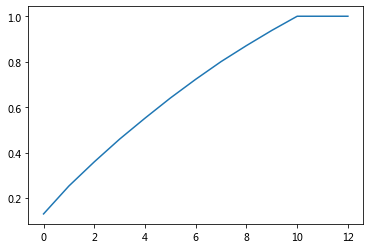

In [27]:
pca_line = PCA().fit(X)
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
#plt.xticks([1,2,3,4,5,6,7])
plt.show()

In [20]:
pca.explained_variance_ratio_

array([0.13067109])

In [2]:
df_raw = pd.read_excel('metadata10.xlsx')

In [18]:
#LDA
X = df_raw[[#'max_uutime'
            #,'max_depthtime'
            'Business', 'Politics', 'Entertainment','NaturalDisasters', 'Science/Nature/Tech/Food/Health','ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings'
           #  'dawn', 'morning', 'noon', 'afternoon', 'evening', 'midnight'
           # , 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
            #, 'verified_list','veracity (0=0, 1=1, 2=2)'
            #, 'num_followees_list'
            #, 'num_followers_list'
            #,'account_age_list'
           #,'virality'
           #,'depth'
           #,'max_breadth'
           ]]#virality>max breadth>depth>>others
y = df_raw['size']
lda = LDA(n_components=2)
new_data = lda.fit_transform(X,y)
#new_data.shape

D:\python\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
lda.explained_variance_ratio_

array([0.74570577, 0.08497431])

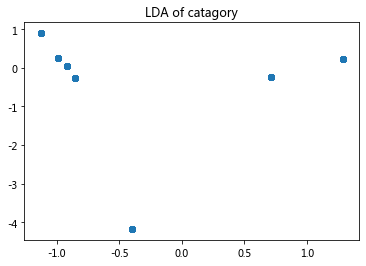

In [25]:
plt.figure()
plt.scatter(new_data[:,0],new_data[:,1]
            ,alpha=0.2
           )
plt.title('LDA of catagory')
plt.show()

In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,126301.0,6.315000e+04,3.646010e+04,0.000000e+00,31575.0,63150.0,94725.0,1.263000e+05
raw_id,126301.0,6.315100e+04,3.646010e+04,1.000000e+00,31576.0,63151.0,94726.0,1.263010e+05
tid,126301.0,1.098084e+06,1.265364e+06,0.000000e+00,626880.0,658455.0,737832.0,4.034734e+06
virality,126301.0,5.433857e-01,8.594704e-01,0.000000e+00,0.0,0.0,1.0,1.024542e+01
verified_list,126301.0,5.559369e-03,6.126991e-02,0.000000e+00,0.0,0.0,0.0,1.000000e+00
"veracity (0=0, 1=1, 2=2)",126301.0,5.392277e-01,7.968609e-01,0.000000e+00,0.0,0.0,1.0,2.000000e+00
num_followees_list,126301.0,1.390289e+03,3.371995e+03,0.000000e+00,263.0,596.0,1615.5,2.500940e+05
num_followers_list,126301.0,1.814799e+03,1.132237e+04,0.000000e+00,207.0,569.0,1517.0,3.174605e+06
account_age_list,126301.0,1.253889e+03,6.765464e+02,2.100000e+01,740.0,1233.0,1716.0,3.700000e+03
depth,126301.0,5.689741e-01,1.108173e+00,0.000000e+00,0.0,0.0,1.0,2.400000e+01


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126301 entries, 0 to 126300
Data columns (total 47 columns):
Unnamed: 0                          126301 non-null int64
raw_id                              126301 non-null int64
tid                                 126301 non-null int64
rumor_id                            126301 non-null object
virality                            126301 non-null float64
verified_list                       126301 non-null float64
veracity (0=0, 1=1, 2=2)            126301 non-null int64
num_followees_list                  126301 non-null float64
num_followers_list                  126301 non-null float64
engagement_list                     126301 non-null object
account_age_list                    126301 non-null float64
depth2time                          126301 non-null object
depth2uu                            126301 non-null object
depth2breadth                       126301 non-null object
uu2time                             126301 non-null object
dep

In [7]:
df_raw['depth'].value_counts()

0     84220
1     25911
2      9577
3      3574
4      1514
5       640
6       332
7       186
8       127
9        64
10       42
11       37
12       21
14       16
13       12
15        8
16        7
19        6
17        4
18        2
24        1
Name: depth, dtype: int64

In [2]:
# NEW START
df = pd.read_excel('metadata2.xlsx')

In [21]:
df['size'].value_counts()

1       84220
2       12980
3        6761
4        3857
5        2688
        ...  
613         1
549         1
7975        1
5926        1
8196        1
Name: size, Length: 1357, dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'raw_id', 'tid', 'rumor_id', 'virality', 'verified_list',
       'veracity (0=0, 1=1, 2=2)', 'num_followees_list', 'num_followers_list',
       'engagement_list', 'account_age_list', 'depth2time', 'depth2uu',
       'depth2breadth', 'uu2time', 'depth', 'unique_users', 'max_breadth',
       'start_date', 'date', 'size', 'Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'sum_depth2uu', 'sum_depth2time', 'sum_depth2breadth', 'sum_uu2time',
       'max_depthtime', 'max_uutime'],
      dtype='object')

In [39]:
num = df['size'].sort_values(ascending = False,inplace = False)
num

106956    46895
106955    45451
106954    42149
106953    41196
106952    38240
          ...  
58874         1
58875         1
58876         1
58877         1
0             1
Name: size, Length: 126301, dtype: int64

<Figure size 14400x3600 with 0 Axes>

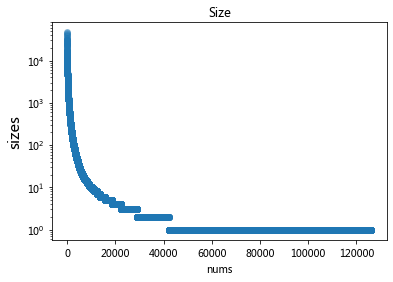

In [54]:
fig = plt.figure(figsize=(200,50))
plt.figure()
plt.scatter(df['Unnamed: 0'],num,alpha=0.4)
# plt.title('PCA of time')
# plt.xscale('log')
plt.yscale('log')
ax1 = plt.gca()
ax1.set_title('Size')
ax1.set_xlabel('nums',fontsize = 10)
ax1.set_ylabel('sizes',fontsize = 15)
plt.show()

In [66]:
df['depth2time'][100007].split(',')[0].split(':')[1]

'0.0'

In [286]:
#uutime修正
import xlwt 
wb = xlwt.Workbook(encoding='utf-8')
ws = wb.add_sheet('Sheet1') #sheet页第一页
f = open('metadata_anon_2.txt', encoding='gbk') 

row_excel = 0
uutime = []
#df['uutime']=''
#uutime = df['uutime']

for line in f:
    #line = line.strip('\n') #去掉换行符
    line = line.split('@') #每一行以"+"分隔
    uutime.append(line[11])
c={"uutime" : uutime}#将列表a，b转换成字典
df['uutime']=DataFrame(c)#将字典转换成为数据框
df['uutime']

0         1:0.0
1         1:0.0
2         1:0.0
3         1:0.0
4         1:0.0
          ...  
126296    1:0.0
126297    1:0.0
126298    1:0.0
126299    1:0.0
126300    1:0.0
Name: uutime, Length: 126301, dtype: object

In [84]:
#返回清理后格式
def clean_data(d):
    a = [i.split(':') for i in d.split(',')]
    a = [[int(i), float(j)]  for i,j in a]
    return a

In [161]:
##给定前k个用户，获取uutime/depth/max breadth

In [290]:
#find uutume in specific k
def find_uutime_for_k(ind, k):
    try:
        uu2t = clean_data(df['uutime'][ind])
        kt = uu2t[k-1][1]
        return kt
    except Exception as e:
        uu3t = clean_data(df['uutime'][ind])
        uut = [[i,j] for i,j in uu3t][-1][-1]
        return uut
uutime_k = find_uutime_for_k(7784, 5)
uutime_k

34.0

In [238]:
#find depth in specific uutime
def find_depth_for_k(ind, k):
    try:
        uu2t = clean_data(df['uu2time'][ind])
        dt = clean_data(df['depth2time'][ind])
        kt = uu2t[k-1][1]
        depth_k = [[i,j,j-kt] for i,j in dt if j-kt <=0][-1][0]
        return depth_k
    except Exception as e:
        return df['depth'][ind]
depth_k = find_depth_for_k(8357, 15)#提供depth
depth_k

4

In [239]:
#find max breadth in specific depth
def find_breadth_for_k(ind, k):
    try:
        uu2t = clean_data(df['uu2time'][ind])
        dt = clean_data(df['depth2time'][ind])
        kt = uu2t[k-1][1]
        depth_k = [[i,j,j-kt] for i,j in dt if j-kt <=0][-1][0]
        d2b_time = clean_data(df['depth2breadth'][ind])[:depth_k]
        return d2b_time
    except Exception as e:
        return [[int(df['max_breadth'][ind])],[0]]
#在这里面找出最大值
def max_lists(*lst):
    return max(max(*lst, key=lambda v: max(v)))
    #except Exception as e:
        #return 0
breadth_k = max_lists(find_breadth_for_k(8357, 5))
breadth_k

3.0

In [291]:
#k = 5
df['k5_uutime']=''
k5_uutime = df['k5_uutime']
df['k5_depth']=''
k5_depth = df['k5_depth']
df['k5_breadth']=''
k5_breadth = df['k5_breadth']
for i in range (0,126301):
    k5_uutime[i] = find_uutime_for_k(i, 5)
    k5_depth[i] = find_depth_for_k(i, 5)
    k5_breadth[i] = max_lists(find_breadth_for_k(i, 5))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [300]:
#k = 10
df['k10_uutime']=''
k10_uutime = df['k10_uutime']
df['k10_depth']=''
k10_depth = df['k10_depth']
df['k10_breadth']=''
k10_breadth = df['k10_breadth']
for i in range (0,126301):
    k10_uutime[i] = find_uutime_for_k(i, 10)
    k10_depth[i] = find_depth_for_k(i, 10)
    k10_breadth[i] = max_lists(find_breadth_for_k(i, 10))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [301]:
#k = 15
df['k15_uutime']=''
k15_uutime = df['k15_uutime']
df['k15_depth']=''
k15_depth = df['k15_depth']
df['k15_breadth']=''
k15_breadth = df['k15_breadth']
for i in range (0,126301):
    k15_uutime[i] = find_uutime_for_k(i, 15)
    k15_depth[i] = find_depth_for_k(i, 15)
    k15_breadth[i] = max_lists(find_breadth_for_k(i, 15))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [302]:
#k = 20
df['k20_uutime']=''
k20_uutime = df['k20_uutime']
df['k20_depth']=''
k20_depth = df['k20_depth']
df['k20_breadth']=''
k20_breadth = df['k20_breadth']
for i in range (0,126301):
    k20_uutime[i] = find_uutime_for_k(i, 20)
    k20_depth[i] = find_depth_for_k(i, 20)
    k20_breadth[i] = max_lists(find_breadth_for_k(i, 20))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [303]:
#k = 25
df['k25_uutime']=''
k25_uutime = df['k25_uutime']
df['k25_depth']=''
k25_depth = df['k25_depth']
df['k25_breadth']=''
k25_breadth = df['k25_breadth']
for i in range (0,126301):
    k25_uutime[i] = find_uutime_for_k(i, 25)
    k25_depth[i] = find_depth_for_k(i, 25)
    k25_breadth[i] = max_lists(find_breadth_for_k(i, 25))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [305]:
#k = 30
df['k30_uutime']=''
k30_uutime = df['k30_uutime']
df['k30_depth']=''
k30_depth = df['k30_depth']
df['k30_breadth']=''
k30_breadth = df['k30_breadth']
for i in range (0,126301):
    k30_uutime[i] = find_uutime_for_k(i, 30)
    k30_depth[i] = find_depth_for_k(i, 30)
    k30_breadth[i] = max_lists(find_breadth_for_k(i, 30))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [306]:
#k = 35
df['k35_uutime']=''
k35_uutime = df['k35_uutime']
df['k35_depth']=''
k35_depth = df['k35_depth']
df['k35_breadth']=''
k35_breadth = df['k35_breadth']
for i in range (0,126301):
    k35_uutime[i] = find_uutime_for_k(i, 35)
    k35_depth[i] = find_depth_for_k(i, 35)
    k35_breadth[i] = max_lists(find_breadth_for_k(i, 35))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [307]:
#k = 40
df['k40_uutime']=''
k40_uutime = df['k40_uutime']
df['k40_depth']=''
k40_depth = df['k40_depth']
df['k40_breadth']=''
k40_breadth = df['k40_breadth']
for i in range (0,126301):
    k40_uutime[i] = find_uutime_for_k(i, 40)
    k40_depth[i] = find_depth_for_k(i, 40)
    k40_breadth[i] = max_lists(find_breadth_for_k(i, 40))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [308]:
#k = 45
df['k45_uutime']=''
k45_uutime = df['k45_uutime']
df['k45_depth']=''
k45_depth = df['k45_depth']
df['k45_breadth']=''
k45_breadth = df['k45_breadth']
for i in range (0,126301):
    k45_uutime[i] = find_uutime_for_k(i, 45)
    k45_depth[i] = find_depth_for_k(i, 45)
    k45_breadth[i] = max_lists(find_breadth_for_k(i, 45))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [309]:
#k = 50
df['k50_uutime']=''
k50_uutime = df['k50_uutime']
df['k50_depth']=''
k50_depth = df['k50_depth']
df['k50_breadth']=''
k50_breadth = df['k50_breadth']
for i in range (0,126301):
    k50_uutime[i] = find_uutime_for_k(i, 50)
    k50_depth[i] = find_depth_for_k(i, 50)
    k50_breadth[i] = max_lists(find_breadth_for_k(i, 50))

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveSh

In [310]:
df.to_excel('metadata4.xlsx')#没问题

In [314]:
k_score=[]

In [324]:
X = df[['k50_uutime', 'k50_depth', 'k50_breadth']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
k_score.append(score)
k_score

[0.8894724340872503,
 0.9046475416325777,
 0.9048850650550263,
 0.907365865245045,
 0.9081048270037739,
 0.9101369718402786,
 0.9099522314005964,
 0.9072075162967459,
 0.9090021377108021,
 0.9095827505212319]

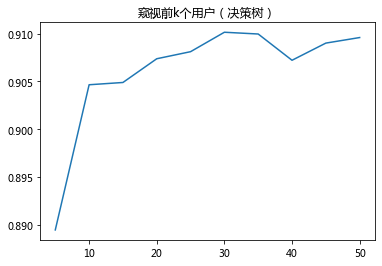

In [330]:
plt.figure()
plt.plot([5,10,15,20,25,30,35,40,45,50],k_score)
plt.plot([5,10,15,20,25,30,35,40,45,50],)
ax1 = plt.gca()
ax1.set_title('窥视前k个用户（决策树）')
plt.show()

In [447]:
X = df[['k50_uutime', 'k50_depth', 'k50_breadth']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=35,random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
score_r

0.9050170225119422

In [517]:
del df['uutime']
pd.set_option('display.max_rows', None) # 展示所有行
pd.set_option('display.max_columns', None) # 展示所有列
df.columns[66]

'k35_uutime'

In [518]:
columns_list = df.columns.tolist()
df_index = pd.DataFrame(columns_list)
df_index

,0
0,Unnamed: 0
1,raw_id
2,tid
3,rumor_id
4,virality
5,verified_list
6,"veracity (0=0, 1=1, 2=2)"
7,num_followees_list
8,num_followers_list
9,engagement_list


In [519]:
i = 48#48-77
kscore_r=[]
while i <= 75:
    X = df[[columns_list[i], columns_list[i+1], columns_list[i+2]]]
    y = df['size']
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=35,random_state=0)
    rfc = rfc.fit(Xtrain,Ytrain)
    score_r = rfc.score(Xtest,Ytest)
    kscore_r.append(score_r)
    i += 3
kscore_r

[0.8887598638199045,
 0.904410018210129,
 0.9052281544430075,
 0.906178248132802,
 0.9064157715552505,
 0.9087646142883534,
 0.905280937425774,
 0.9080784355123908,
 0.9060198991845029,
 0.9070227758570637]

In [540]:
i = 48#48-77
L_score=[]
while i <= 75:
    X = df[[columns_list[i], columns_list[i+1], columns_list[i+2]]]
    y = df['size']
    X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.7, test_size = 0.3)
    model = LinearRegression(fit_intercept=True)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    score = r2_score(y2, y_pred)
    L_score.append(score)
    i += 3
L_score

[0.8844907831263792,
 0.8851532594524475,
 0.8854227281842801,
 0.8853324274091565,
 0.8854566923081499,
 0.8854067204831569,
 0.8854941695428227,
 0.8856409571596711,
 0.8856888758113445,
 0.885766130726882]

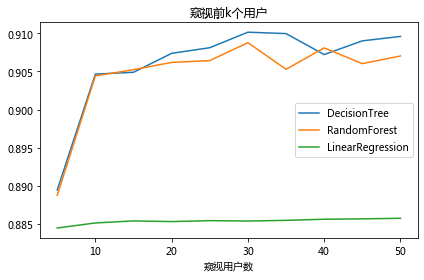

In [6]:
plt.figure()
plt.plot([5,10,15,20,25,30,35,40,45,50],k_score)
plt.plot([5,10,15,20,25,30,35,40,45,50],kscore_r)
plt.plot([5,10,15,20,25,30,35,40,45,50],L_score)
plt.legend(['DecisionTree','RandomForest','LinearRegression'])
ax1 = plt.gca()
ax1.set_title('窥视前k个用户')
plt.xlabel("窥视用户数")
plt.tight_layout()
plt.savefig("窥视前k个用户.png",dpi=300)
plt.show()

In [ ]:
##前t分钟

In [361]:
#find depth in specific t
def find_depth_t(ind,t):
    try:
        depthtime = clean_data(df['depth2time'][ind])
        depth_t = [[i,j,j-t] for i,j in depthtime if j-t <=0][-1][0]
        return depth_t
    except Exception as e:
        return 0
find_depth_t(0,999)

0

In [367]:
#find uu in specific t
def find_uu_t(ind,t):
    uutime = clean_data(df['uutime'][ind])
    uu_t = [[i,j,j-t] for i,j in uutime if j-t <=0][-1][0]
    return uu_t
find_uu_t(10,1111111110)

1

In [372]:
#find max breadth in specific t
def find_breadth_for_t(ind, t):
    try:
        depthtime = clean_data(df['depth2time'][ind])
        depth_t = [[i,j,j-t] for i,j in depthtime if j-t <=0][-1][0]
        d2b_time_2 = clean_data(df['depth2breadth'][ind])[:depth_t]
        return d2b_time_2
    except Exception as e:
        return [[int(df['max_breadth'][ind])],[0]]
#在这里面找出最大值
def max_lists(*lst):
    return max(max(*lst, key=lambda v: max(v)))
breadth_t = max_lists(find_breadth_for_t(0, 213573))
breadth_t

1

In [387]:
#t = 60
df['t60_uu']=''
t60_uu = df['t60_uu']
df['t60_depth']=''
t60_depth = df['t60_depth']
df['t60_breadth']=''
t60_breadth = df['t60_breadth']
for i in range (0,126301):
    t60_uu[i] = find_uu_t(i, 60)
    t60_depth[i] = find_depth_t(i, 60)
    t60_breadth[i] = max_lists(find_breadth_for_t(i, 60))

df['t120_uu']=''
t120_uu = df['t120_uu']
df['t120_depth']=''
t120_depth = df['t120_depth']
df['t120_breadth']=''
t120_breadth = df['t120_breadth']
for i in range (0,126301):
    t120_uu[i] = find_uu_t(i, 120)
    t120_depth[i] = find_depth_t(i, 120)
    t120_breadth[i] = max_lists(find_breadth_for_t(i, 120))

df['t180_uu']=''
t180_uu = df['t180_uu']
df['t180_depth']=''
t180_depth = df['t180_depth']
df['t180_breadth']=''
t180_breadth = df['t180_breadth']
for i in range (0,126301):
    t180_uu[i] = find_uu_t(i, 180)
    t180_depth[i] = find_depth_t(i, 180)
    t180_breadth[i] = max_lists(find_breadth_for_t(i, 180))

df['t240_uu']=''
t240_uu = df['t240_uu']
df['t240_depth']=''
t240_depth = df['t240_depth']
df['t240_breadth']=''
t240_breadth = df['t240_breadth']
for i in range (0,126301):
    t240_uu[i] = find_uu_t(i, 240)
    t240_depth[i] = find_depth_t(i, 240)
    t240_breadth[i] = max_lists(find_breadth_for_t(i, 240))

df['t300_uu']=''
t300_uu = df['t300_uu']
df['t300_depth']=''
t300_depth = df['t300_depth']
df['t300_breadth']=''
t300_breadth = df['t300_breadth']
for i in range (0,126301):
    t300_uu[i] = find_uu_t(i, 300)
    t300_depth[i] = find_depth_t(i, 300)
    t300_breadth[i] = max_lists(find_breadth_for_t(i, 300))

df['t360_uu']=''
t360_uu = df['t360_uu']
df['t360_depth']=''
t360_depth = df['t360_depth']
df['t360_breadth']=''
t360_breadth = df['t360_breadth']
for i in range (0,126301):
    t360_uu[i] = find_uu_t(i, 360)
    t360_depth[i] = find_depth_t(i, 360)
    t360_breadth[i] = max_lists(find_breadth_for_t(i, 360))
    
df['t420_uu']=''
t420_uu = df['t420_uu']
df['t420_depth']=''
t420_depth = df['t420_depth']
df['t420_breadth']=''
t420_breadth = df['t420_breadth']
for i in range (0,126301):
    t420_uu[i] = find_uu_t(i, 420)
    t420_depth[i] = find_depth_t(i, 420)
    t420_breadth[i] = max_lists(find_breadth_for_t(i, 420))
    
df['t480_uu']=''
t480_uu = df['t480_uu']
df['t480_depth']=''
t480_depth = df['t480_depth']
df['t480_breadth']=''
t480_breadth = df['t480_breadth']
for i in range (0,126301):
    t480_uu[i] = find_uu_t(i, 480)
    t480_depth[i] = find_depth_t(i, 480)
    t480_breadth[i] = max_lists(find_breadth_for_t(i, 480))

df['t540_uu']=''
t540_uu = df['t540_uu']
df['t540_depth']=''
t540_depth = df['t540_depth']
df['t540_breadth']=''
t540_breadth = df['t540_breadth']
for i in range (0,126301):
    t540_uu[i] = find_uu_t(i, 540)
    t540_depth[i] = find_depth_t(i, 540)
    t540_breadth[i] = max_lists(find_breadth_for_t(i, 540))

df['t600_uu']=''
t600_uu = df['t600_uu']
df['t600_depth']=''
t600_depth = df['t600_depth']
df['t600_breadth']=''
t600_breadth = df['t600_breadth']
for i in range (0,126301):
    t600_uu[i] = find_uu_t(i, 600)
    t600_depth[i] = find_depth_t(i, 600)
    t600_breadth[i] = max_lists(find_breadth_for_t(i, 600))
    
df['t660_uu']=''
t660_uu = df['t660_uu']
df['t660_depth']=''
t660_depth = df['t660_depth']
df['t660_breadth']=''
t660_breadth = df['t660_breadth']
for i in range (0,126301):
    t660_uu[i] = find_uu_t(i, 660)
    t660_depth[i] = find_depth_t(i, 660)
    t660_breadth[i] = max_lists(find_breadth_for_t(i, 660))
    
df['t720_uu']=''
t720_uu = df['t720_uu']
df['t720_depth']=''
t720_depth = df['t720_depth']
df['t720_breadth']=''
t720_breadth = df['t720_breadth']
for i in range (0,126301):
    t720_uu[i] = find_uu_t(i, 720)
    t720_depth[i] = find_depth_t(i, 720)
    t720_breadth[i] = max_lists(find_breadth_for_t(i, 720))

df['t780_uu']=''
t780_uu = df['t780_uu']
df['t780_depth']=''
t780_depth = df['t780_depth']
df['t780_breadth']=''
t780_breadth = df['t780_breadth']
for i in range (0,126301):
    t780_uu[i] = find_uu_t(i, 780)
    t780_depth[i] = find_depth_t(i, 780)
    t780_breadth[i] = max_lists(find_breadth_for_t(i, 780))
    
df['t840_uu']=''
t840_uu = df['t840_uu']
df['t840_depth']=''
t840_depth = df['t840_depth']
df['t840_breadth']=''
t840_breadth = df['t840_breadth']
for i in range (0,126301):
    t840_uu[i] = find_uu_t(i, 840)
    t840_depth[i] = find_depth_t(i, 840)
    t840_breadth[i] = max_lists(find_breadth_for_t(i, 840))
    
df['t900_uu']=''
t900_uu = df['t900_uu']
df['t900_depth']=''
t900_depth = df['t900_depth']
df['t900_breadth']=''
t900_breadth = df['t900_breadth']
for i in range (0,126301):
    t900_uu[i] = find_uu_t(i, 900)
    t900_depth[i] = find_depth_t(i, 900)
    t900_breadth[i] = max_lists(find_breadth_for_t(i, 900))

df['t960_uu']=''
t960_uu = df['t960_uu']
df['t960_depth']=''
t960_depth = df['t960_depth']
df['t960_breadth']=''
t960_breadth = df['t960_breadth']
for i in range (0,126301):
    t960_uu[i] = find_uu_t(i, 960)
    t960_depth[i] = find_depth_t(i, 960)
    t960_breadth[i] = max_lists(find_breadth_for_t(i, 960))

df['t1020_uu']=''
t1020_uu = df['t1020_uu']
df['t1020_depth']=''
t1020_depth = df['t1020_depth']
df['t1020_breadth']=''
t1020_breadth = df['t1020_breadth']
for i in range (0,126301):
    t1020_uu[i] = find_uu_t(i, 1020)
    t1020_depth[i] = find_depth_t(i, 1020)
    t1020_breadth[i] = max_lists(find_breadth_for_t(i, 1020))
    
df['t1080_uu']=''
t1080_uu = df['t1080_uu']
df['t1080_depth']=''
t1080_depth = df['t1080_depth']
df['t1080_breadth']=''
t1080_breadth = df['t1080_breadth']
for i in range (0,126301):
    t1080_uu[i] = find_uu_t(i, 1080)
    t1080_depth[i] = find_depth_t(i, 1080)
    t1080_breadth[i] = max_lists(find_breadth_for_t(i, 1080))
    
df['t1140_uu']=''
t1140_uu = df['t1140_uu']
df['t1140_depth']=''
t1140_depth = df['t1140_depth']
df['t1140_breadth']=''
t1140_breadth = df['t1140_breadth']
for i in range (0,126301):
    t1140_uu[i] = find_uu_t(i, 1140)
    t1140_depth[i] = find_depth_t(i, 1140)
    t1140_breadth[i] = max_lists(find_breadth_for_t(i, 1140))
    
df['t1200_uu']=''
t1200_uu = df['t1200_uu']
df['t1200_depth']=''
t1200_depth = df['t1200_depth']
df['t1200_breadth']=''
t1200_breadth = df['t1200_breadth']
for i in range (0,126301):
    t1200_uu[i] = find_uu_t(i, 1200)
    t1200_depth[i] = find_depth_t(i, 1200)
    t1200_breadth[i] = max_lists(find_breadth_for_t(i, 1200))
    
df['t1260_uu']=''
t1260_uu = df['t1260_uu']
df['t1260_depth']=''
t1260_depth = df['t1260_depth']
df['t1260_breadth']=''
t1260_breadth = df['t1260_breadth']
for i in range (0,126301):
    t1260_uu[i] = find_uu_t(i, 1260)
    t1260_depth[i] = find_depth_t(i, 1260)
    t1260_breadth[i] = max_lists(find_breadth_for_t(i, 1260))
    
df['t1320_uu']=''
t1320_uu = df['t1320_uu']
df['t1320_depth']=''
t1320_depth = df['t1320_depth']
df['t1320_breadth']=''
t1320_breadth = df['t1320_breadth']
for i in range (0,126301):
    t1320_uu[i] = find_uu_t(i, 1320)
    t1320_depth[i] = find_depth_t(i, 1320)
    t1320_breadth[i] = max_lists(find_breadth_for_t(i, 1320))
    
df['t1380_uu']=''
t1380_uu = df['t1380_uu']
df['t1380_depth']=''
t1380_depth = df['t1380_depth']
df['t1380_breadth']=''
t1380_breadth = df['t1380_breadth']
for i in range (0,126301):
    t1380_uu[i] = find_uu_t(i, 1380)
    t1380_depth[i] = find_depth_t(i, 1380)
    t1380_breadth[i] = max_lists(find_breadth_for_t(i, 1380))

df['t1440_uu']=''
t1440_uu = df['t1440_uu']
df['t1440_depth']=''
t1440_depth = df['t1440_depth']
df['t1440_breadth']=''
t1440_breadth = df['t1440_breadth']
for i in range (0,126301):
    t1440_uu[i] = find_uu_t(i, 1440)
    t1440_depth[i] = find_depth_t(i, 1440)
    t1440_breadth[i] = max_lists(find_breadth_for_t(i, 1440))

df.to_excel('metadata5.xlsx')

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\python\anaconda\lib\site-packages\

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:129: SettingWithCopyWarning: 
A value is trying to be set o

In [395]:
df.columns[-72:]

Index(['t60_uu', 't60_depth', 't60_breadth', 't120_uu', 't120_depth',
       't120_breadth', 't180_uu', 't180_depth', 't180_breadth', 't240_uu',
       't240_depth', 't240_breadth', 't300_uu', 't300_depth', 't300_breadth',
       't360_uu', 't360_depth', 't360_breadth', 't420_uu', 't420_depth',
       't420_breadth', 't480_uu', 't480_depth', 't480_breadth', 't540_uu',
       't540_depth', 't540_breadth', 't600_uu', 't600_depth', 't600_breadth',
       't660_uu', 't660_depth', 't660_breadth', 't720_uu', 't720_depth',
       't720_breadth', 't780_uu', 't780_depth', 't780_breadth', 't840_uu',
       't840_depth', 't840_breadth', 't900_uu', 't900_depth', 't900_breadth',
       't960_uu', 't960_depth', 't960_breadth', 't1020_uu', 't1020_depth',
       't1020_breadth', 't1080_uu', 't1080_depth', 't1080_breadth', 't1140_uu',
       't1140_depth', 't1140_breadth', 't1200_uu', 't1200_depth',
       't1200_breadth', 't1260_uu', 't1260_depth', 't1260_breadth', 't1320_uu',
       't1320_depth', 't

In [404]:
t_score=[]

In [429]:
X = df[[#'t60_uu', 't60_depth', 't60_breadth'
#           't120_uu', 't120_depth','t120_breadth'
#          't180_uu', 't180_depth', 't180_breadth'
#         't240_uu','t240_depth', 't240_breadth'
#         't300_uu', 't300_depth', 't300_breadth'
#         't360_uu', 't360_depth', 't360_breadth'
#          't420_uu', 't420_depth','t420_breadth'
#          't480_uu', 't480_depth', 't480_breadth'
#          't540_uu', 't540_depth', 't540_breadth'
#          't600_uu', 't600_depth', 't600_breadth'
#         't660_uu', 't660_depth', 't660_breadth'
#          't720_uu', 't720_depth', 't720_breadth'
#          't780_uu', 't780_depth', 't780_breadth'
#          't840_uu', 't840_depth', 't840_breadth'
#          't900_uu', 't900_depth', 't900_breadth'
#         't960_uu', 't960_depth', 't960_breadth'
#          't1020_uu', 't1020_depth', 't1020_breadth'
#          't1080_uu', 't1080_depth', 't1080_breadth'
#          't1140_uu','t1140_depth', 't1140_breadth'
#          't1200_uu', 't1200_depth', 't1200_breadth'
#          't1260_uu', 't1260_depth', 't1260_breadth'
#          't1320_uu', 't1320_depth', 't1320_breadth'
#          't1380_uu', 't1380_depth', 't1380_breadth'
#          't1440_uu', 't1440_depth', 't1440_breadth'
       ]]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
t_score.append(score)
t_score

[0.8706816922224275,
 0.8703649943258294,
 0.8727138370589322,
 0.8731624924124463,
 0.8747723733868201,
 0.8767253437491752,
 0.8756960755852313,
 0.8785199651632314,
 0.8791005779736613,
 0.8772003905940725,
 0.8829801272069885,
 0.8822675569396426,
 0.8814494207067641,
 0.8823995143965585,
 0.8830329101897548,
 0.8846163996727455,
 0.8866749360006334,
 0.8869652424058484,
 0.8864638040695679,
 0.8860943231902034,
 0.8893668681217176,
 0.8886542978543718,
 0.8890501702251195,
 0.8903433533028952]

In [900]:
t_score.sort()
t_score[-1]

0.8903433533028952

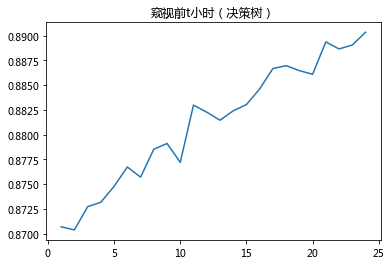

In [442]:
plt.figure()
plt.plot([i for i in range(1,25)],t_score)
ax1 = plt.gca()
ax1.set_title('窥视前t小时（决策树）')
plt.show()

In [526]:
i = 78#78-149
tscore_r=[]
while i <= 147:
    X = df[[columns_list[i], columns_list[i+1], columns_list[i+2]]]
    y = df['size']
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=35,random_state=0)
    rfc = rfc.fit(Xtrain,Ytrain)
    score_r = rfc.score(Xtest,Ytest)
    tscore_r.append(score_r)
    i += 3
tscore_r

[0.8709983901190256,
 0.8748515478609696,
 0.8709192156448761,
 0.8738222796970256,
 0.8741125861022406,
 0.8756696840938482,
 0.8763294713784276,
 0.8785463566546146,
 0.8766197777836425,
 0.8804729355255866,
 0.8801298461376053,
 0.8819772505344277,
 0.8853025784487082,
 0.882768995275923,
 0.8855401018711567,
 0.885144229500409,
 0.883956612388166,
 0.8837718719484838,
 0.8861998891557362,
 0.8862262806471194,
 0.8863054551212689,
 0.8868332849489324,
 0.888100076535325,
 0.8877305956559605]

In [897]:
tscore_r.sort()
tscore_r[-1]

0.888100076535325

In [542]:
i = 78#48-77
Lscore_t=[]
while i <= 147:
    X = df[[columns_list[i], columns_list[i+1], columns_list[i+2]]]
    y = df['size']
    X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.7, test_size = 0.3)
    model = LinearRegression(fit_intercept=True)
    model.fit(X1, y1)
    y_pred = model.predict(X2)
    score_t = r2_score(y2, y_pred)
    Lscore_t.append(score_t)
    i += 3
Lscore_t

[0.879157437868081,
 0.8801987188110302,
 0.8803124205920039,
 0.8797839873961913,
 0.8791522336076162,
 0.8784795984882896,
 0.8777393833463901,
 0.8768301646688733,
 0.8759707904849315,
 0.8753668845848216,
 0.8749354405834838,
 0.8745646911072208,
 0.8743510009092287,
 0.8739554027608143,
 0.8735661738725824,
 0.8734462198282544,
 0.8732421090442599,
 0.8730169885193259,
 0.872912359808127,
 0.8728257292930495,
 0.872687731768224,
 0.8723970910753978,
 0.8721851598308984,
 0.8720846882626385]

In [898]:
Lscore_t.sort()
Lscore_t[-1]

0.8803124205920039

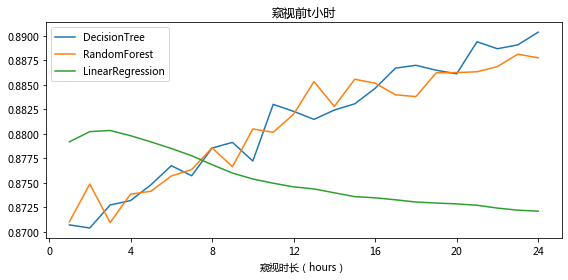

In [5]:
fig = plt.figure(figsize=(8,4))
plt.plot([i for i in range(1,25)],t_score,label='DecisionTree')
plt.plot([i for i in range(1,25)],tscore_r,label='RandomForest')
plt.plot([i for i in range(1,25)],Lscore_t,label='LinearRegression')
ax1 = plt.gca()
ax1.set_xticks([i for i in range(0,25,4)])
ax1.set_title('窥视前t小时')
plt.legend()
plt.xlabel("窥视时长（hours）")
plt.tight_layout()
plt.savefig("窥视前t小时.png",dpi=300)
plt.show()

In [569]:
#逻辑回归
X = df[['k50_uutime', 'k50_depth', 'k50_breadth']]
y = df['size']
lrl1 = LR(solver="liblinear",C=0.5,random_state=420)
lrl1 = lrl1.fit(X,y)
%time cross_val_score(lrl1,X,y,cv=2).mean()

D:\python\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\python\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\python\anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
D:\python\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\python\anaconda\lib\site-packages\sklearn\svm\base.py:929

Wall time: 19min 52s


0.7555389424137

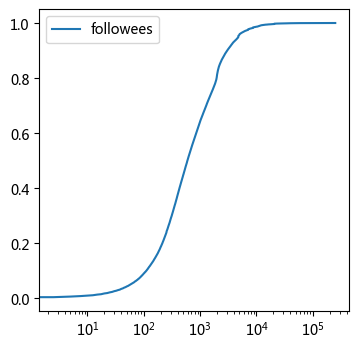

In [636]:
# CDF model
import sys
def cdf_plot(data, name, number):
    """
    data: 一组数据
    name: 在legend上显示的名称
    number: 数据最大最小值之间划分多少段
    """
    ecdf = sm.distributions.ECDF(data)
    x = np.linspace(min(data), max(data), number)
    y = ecdf(x)

    #plt.step(x, y, label=name)
    fig = plt.figure(figsize=(4,4))
    plt.xscale('log')
    plt.plot(x, y, label=name)
    plt.legend()

cdf_plot(df['num_followees_list'],'followees',100000)

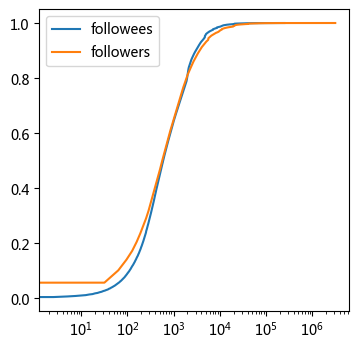

In [642]:
#CDF图
data1 = df['num_followees_list']
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 100000)
y1 = ecdf(x1)
data2 = df['num_followers_list']
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 100000)
y2 = ecdf(x2)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
plt.plot(x1, y1, label='followees')
plt.plot(x2, y2, label='followers')
plt.legend()

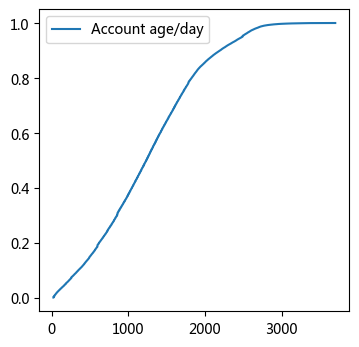

In [645]:
data1 = df['account_age_list']
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 100000)
y1 = ecdf(x1)
fig = plt.figure(figsize=(4,4))
#plt.xscale('log')
plt.plot(x1, y1, label='Account age/day')
plt.legend()

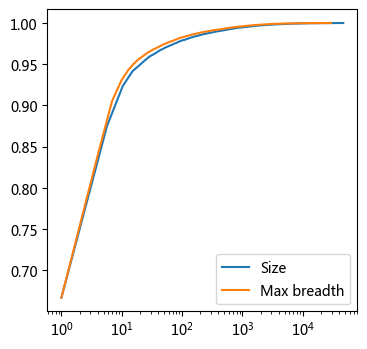

In [674]:
data1 = df['size']
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = df['max_breadth']
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
plt.plot(x1, y1, label='Size')
plt.plot(x2, y2, label='Max breadth')
plt.legend()

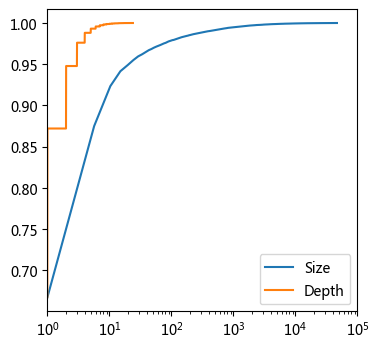

In [676]:
data1 = df['size']
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = df['depth']
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
axes = plt.gca()
axes.set_xlim([1,100000])
plt.plot(x1, y1, label='Size')
plt.plot(x2, y2, label='Depth')
plt.legend()

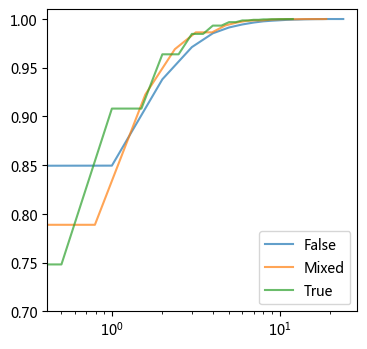

In [727]:
depth0=[]
depth1=[]
depth2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        depth0.append(df['depth'][i])
    elif 0 < veracity < 2:
        depth1.append(df['depth'][i])
    elif 1 < veracity < 3:
        depth2.append(df['depth'][i])

data1 = depth0
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 25)
y1 = ecdf(x1)
data2 = depth1
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 25)
y2 = ecdf(x2)
data3 = depth2
ecdf = sm.distributions.ECDF(data3)
x3 = np.linspace(min(data3), max(data3), 25)
y3 = ecdf(x3)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
axes = plt.gca()
axes.set_ylim([0.7,1.01])
plt.plot(x1, y1, label='False',alpha=0.7)
plt.plot(x2, y2, label='Mixed',alpha=0.7)
plt.plot(x3, y3, label='True',alpha=0.7)
plt.legend(loc='lower right')

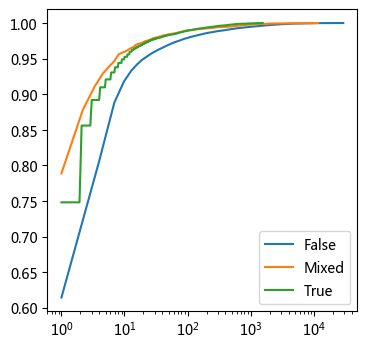

In [696]:
breadth0=[]
breadth1=[]
breadth2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        breadth0.append(df['max_breadth'][i])
    elif 0 < veracity < 2:
        breadth1.append(df['max_breadth'][i])
    elif 1 < veracity < 3:
        breadth2.append(df['max_breadth'][i])

data1 = breadth0
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = breadth1
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
data3 = breadth2
ecdf = sm.distributions.ECDF(data3)
x3 = np.linspace(min(data3), max(data3), 10000)
y3 = ecdf(x3)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
axes = plt.gca()
#axes.set_ylim([1,25])
plt.plot(x1, y1, label='False')
plt.plot(x2, y2, label='Mixed')
plt.plot(x3, y3, label='True')
plt.legend(loc='lower right')

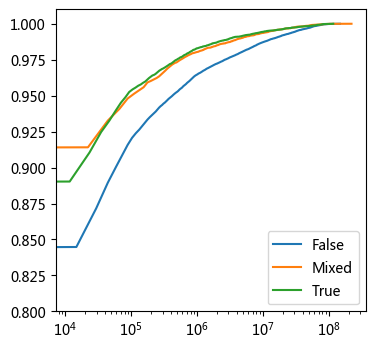

In [708]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['max_uutime'][i])
    elif 0 < veracity < 2:
        uu1.append(df['max_uutime'][i])
    elif 1 < veracity < 3:
        uu2.append(df['max_uutime'][i])

data1 = uu0
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = uu1
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
data3 = uu2
ecdf = sm.distributions.ECDF(data3)
x3 = np.linspace(min(data3), max(data3), 10000)
y3 = ecdf(x3)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
axes = plt.gca()
axes.set_ylim([0.8,1.01])
plt.plot(x1, y1, label='False')
plt.plot(x2, y2, label='Mixed')
plt.plot(x3, y3, label='True')
plt.legend(loc='lower right')

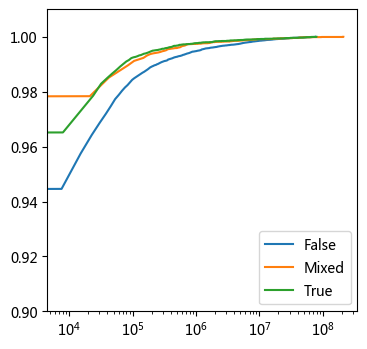

In [711]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['max_depthtime'][i])
    elif 0 < veracity < 2:
        uu1.append(df['max_depthtime'][i])
    elif 1 < veracity < 3:
        uu2.append(df['max_depthtime'][i])

data1 = uu0
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = uu1
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
data3 = uu2
ecdf = sm.distributions.ECDF(data3)
x3 = np.linspace(min(data3), max(data3), 10000)
y3 = ecdf(x3)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
axes = plt.gca()
axes.set_ylim([0.9,1.01])
plt.plot(x1, y1, label='False')
plt.plot(x2, y2, label='Mixed')
plt.plot(x3, y3, label='True')
plt.legend(loc='lower right')

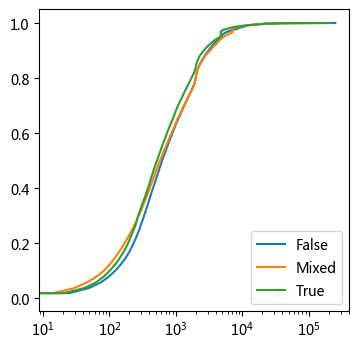

In [713]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['num_followees_list'][i])
    elif 0 < veracity < 2:
        uu1.append(df['num_followees_list'][i])
    elif 1 < veracity < 3:
        uu2.append(df['num_followees_list'][i])

data1 = uu0
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = uu1
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
data3 = uu2
ecdf = sm.distributions.ECDF(data3)
x3 = np.linspace(min(data3), max(data3), 10000)
y3 = ecdf(x3)
fig = plt.figure(figsize=(4,4))
plt.xscale('log')
axes = plt.gca()
#axes.set_ylim([0.9,1.01])
plt.plot(x1, y1, label='False')
plt.plot(x2, y2, label='Mixed')
plt.plot(x3, y3, label='True')
plt.legend(loc='lower right')

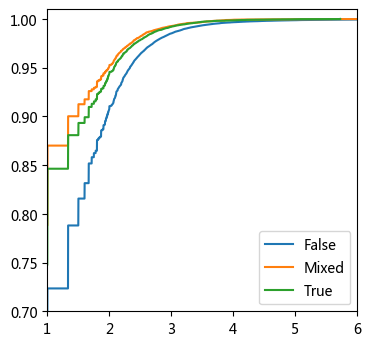

In [725]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['virality'][i])
    elif 0 < veracity < 2:
        uu1.append(df['virality'][i])
    elif 1 < veracity < 3:
        uu2.append(df['virality'][i])

data1 = uu0
ecdf = sm.distributions.ECDF(data1)
x1 = np.linspace(min(data1), max(data1), 10000)
y1 = ecdf(x1)
data2 = uu1
ecdf = sm.distributions.ECDF(data2)
x2 = np.linspace(min(data2), max(data2), 10000)
y2 = ecdf(x2)
data3 = uu2
ecdf = sm.distributions.ECDF(data3)
x3 = np.linspace(min(data3), max(data3), 10000)
y3 = ecdf(x3)
fig = plt.figure(figsize=(4,4))
#plt.xscale('log')
axes = plt.gca()
axes.set_xlim([1,6])
axes.set_ylim([0.7,1.01])
plt.plot(x1, y1, label='False')
plt.plot(x2, y2, label='Mixed')
plt.plot(x3, y3, label='True')
plt.legend(loc='lower right')

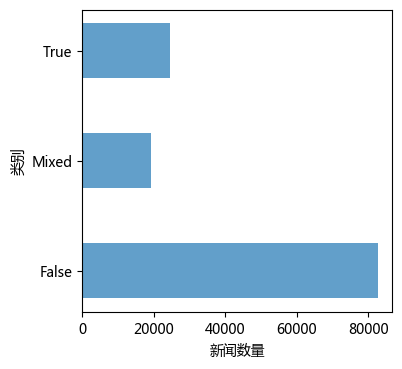

In [741]:
a=0
b=0
c=0
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['virality'][i])
        a+=1
    elif 0 < veracity < 2:
        uu1.append(df['virality'][i])
        b+=1
    elif 1 < veracity < 3:
        uu2.append(df['virality'][i])
        c+=1
y = [a,b,c]
x = [1,2,3]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["False","Mixed","True"],alpha=0.7,height=0.5)
plt.xlabel("新闻数量")
plt.ylabel("类别")
plt.savefig("图1_各类别新闻的数量.png",dpi=300)
plt.show()

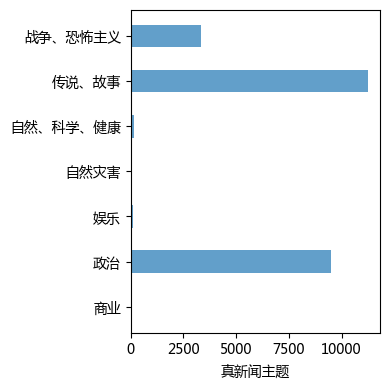

In [882]:
y = [19,9520,111,1,173,11260,3325]
x = [1,2,3,4,5,6,7]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["商业","政治","娱乐",'自然灾害','自然、科学、健康','传说、故事','战争、恐怖主义'],alpha=0.7,height=0.5)
plt.xlabel("真新闻主题")
#plt.xscale('log')
#plt.ylabel("类别")
plt.tight_layout()
plt.savefig("真新闻主题.png",dpi=300)
plt.show()

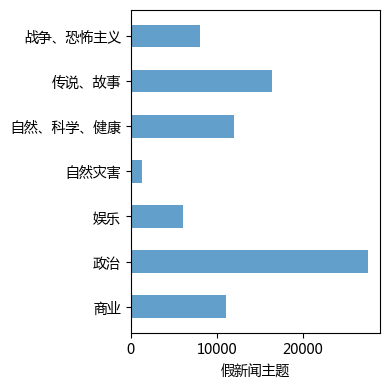

In [881]:
y = [11086,27600,6046,1318,12043,16458,8054]
x = [1,2,3,4,5,6,7]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["商业","政治","娱乐",'自然灾害','自然、科学、健康','传说、故事','战争、恐怖主义'],alpha=0.7,height=0.5)
plt.xlabel("假新闻主题")
#plt.xscale('log')
#plt.ylabel("类别")
plt.tight_layout()
plt.savefig("假新闻主题.png",dpi=300)
plt.show()

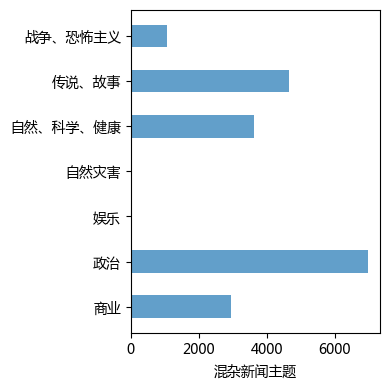

In [880]:
y = [2936,6975,18,16,3636,4649,1057]
x = [1,2,3,4,5,6,7]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["商业","政治","娱乐",'自然灾害','自然、科学、健康','传说、故事','战争、恐怖主义'],alpha=0.7,height=0.5)
plt.xlabel("混杂新闻主题")
#plt.xscale('log')
#plt.ylabel("类别")
plt.tight_layout()
plt.savefig("混杂新闻主题.png",dpi=300)
plt.show()

In [ ]:
#'Business', 'Politics', 'Entertainment','NaturalDisasters', 'Science/Nature/Tech/Food/Health','ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings'

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


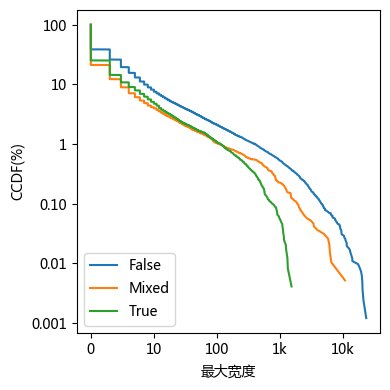

In [817]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['max_breadth'][i])
    elif 0 < veracity < 2:
        uu1.append(df['max_breadth'][i])
    elif 1 < veracity < 3:
        uu2.append(df['max_breadth'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = np.log10(data0)
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = np.log10(data1)
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = np.log10(data2)
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
axes.set_xticklabels(['0','0','10','100','1k','10k'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
plt.xlabel("最大宽度")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻的最大宽度.png",dpi=300)
plt.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


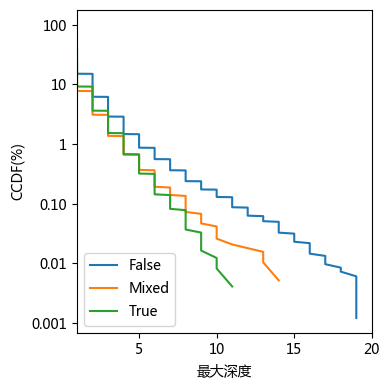

In [816]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['depth'][i])
    elif 0 < veracity < 2:
        uu1.append(df['depth'][i])
    elif 1 < veracity < 3:
        uu2.append(df['depth'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = data0
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = data1
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = data2
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
#axes.set_xticklabels(['0','0','10','100','1k','10k'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
axes.set_xlim([1,20])
plt.xlabel("最大深度")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻的最大深度.png",dpi=300)
plt.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


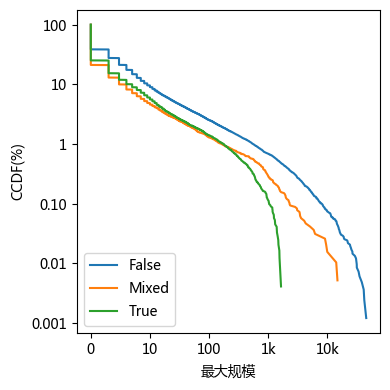

In [815]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['size'][i])
    elif 0 < veracity < 2:
        uu1.append(df['size'][i])
    elif 1 < veracity < 3:
        uu2.append(df['size'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = np.log10(data0)
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = np.log10(data1)
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = np.log10(data2)
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
axes.set_xticklabels(['0','0','10','100','1k','10k'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
#axes.set_xlim([1,20])
plt.xlabel("最大规模")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻的最大规模.png",dpi=300)
plt.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


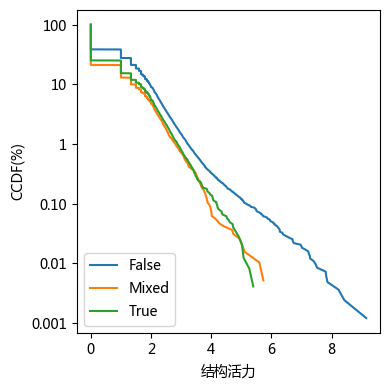

In [872]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['virality'][i])
    elif 0 < veracity < 2:
        uu1.append(df['virality'][i])
    elif 1 < veracity < 3:
        uu2.append(df['virality'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = data0
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = data1
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = data2
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
#axes.set_xticklabels(['0','0','10','100','1k','10k'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
#axes.set_xlim([1,20])
plt.xlabel("结构活力")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻的结构活力.png",dpi=300)
plt.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


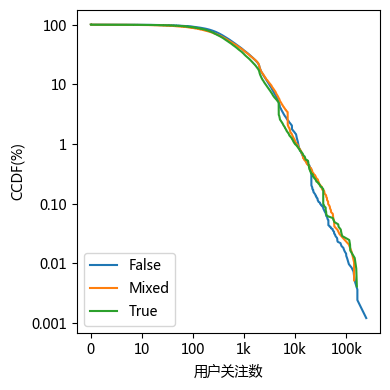

In [884]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['num_followees_list'][i])
    elif 0 < veracity < 2:
        uu1.append(df['num_followees_list'][i])
    elif 1 < veracity < 3:
        uu2.append(df['num_followees_list'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = np.log10(data0)
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = np.log10(data1)
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = np.log10(data2)
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
axes.set_xticklabels(['0','0','10','100','1k','10k','100k'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
#axes.set_ylim([-3,2])
plt.xlabel("用户关注数")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻用户的中位关注用户数.png",dpi=300)
plt.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


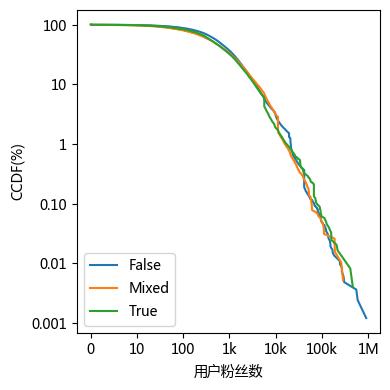

In [883]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['num_followers_list'][i])
    elif 0 < veracity < 2:
        uu1.append(df['num_followers_list'][i])
    elif 1 < veracity < 3:
        uu2.append(df['num_followers_list'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = np.log10(data0)
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = np.log10(data1)
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = np.log10(data2)
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
axes.set_xticklabels(['0','0','10','100','1k','10k','100k','1M'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
#axes.set_ylim([-3,2])
plt.xlabel("用户粉丝数")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻用户的中位粉丝.png",dpi=300)
plt.show()

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


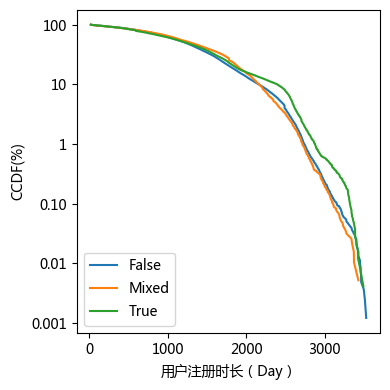

In [885]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(df['account_age_list'][i])
    elif 0 < veracity < 2:
        uu1.append(df['account_age_list'][i])
    elif 1 < veracity < 3:
        uu2.append(df['account_age_list'][i])
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = data0
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = data1
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = data2
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
#axes.set_xticklabels(['0','0','10','100','1k','10k','100k','1M'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
#axes.set_ylim([-3,2])
plt.xlabel("用户注册时长（Day）")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻用户的中位注册时长.png",dpi=300)
plt.show()

In [3]:
#处理engagement部分的bug
df['test_engagemengt']=''
test_engagemengt = df['test_engagemengt']
for i in range (0,126301):
    try:
        test_engagemengt[i] = float(df['engagement_list'][i])
    except Exception as e:
        test_engagemengt[i] = 0
#df['test_engagemengt'].to_excel('test1.xlsx')

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


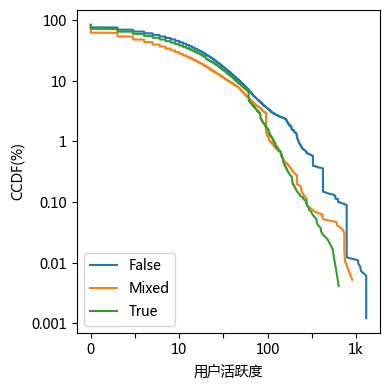

In [886]:
uu0=[]
uu1=[]
uu2=[]
for i in range (0,126301):
    veracity = df['veracity (0=0, 1=1, 2=2)'][i]
    if veracity < 1:
        uu0.append(int(df['test_engagemengt'][i]))
    elif 0 < veracity < 2:
        uu1.append(int(df['test_engagemengt'][i]))
    elif 1 < veracity < 3:
        uu2.append(int(df['test_engagemengt'][i]))
data0=uu0
data0.sort()
p = 1. * arange(len(data0)) / (len(data0)-1) 
p = [1-i for i in p]
x0 = np.log10(data0)
y0 = np.log10(p)
data1=uu1
data1.sort()
p = 1. * arange(len(data1)) / (len(data1)-1) 
p = [1-i for i in p]
x1 = np.log10(data1)
y1 = np.log10(p)
data2=uu2
data2.sort()
p = 1. * arange(len(data2)) / (len(data2)-1) 
p = [1-i for i in p]
x2 = np.log10(data2)
y2 = np.log10(p)
fig = plt.figure(figsize=(4,4))
plt.plot(x0, y0, label='False')
plt.plot(x1, y1, label='Mixed')
plt.plot(x2, y2, label='True')
plt.legend(loc='lower left')
axes = plt.gca()
axes.set_xticklabels(['0','0',' ','10',' ','100',' ','1k'])
axes.set_yticklabels(['1001','0.001','0.01','0.10','1','10','100'])
#axes.set_ylim([-3,2])
plt.xlabel("用户活跃度")
plt.ylabel("CCDF(%)")
plt.tight_layout()
plt.savefig("各类别新闻用户的中位活跃度.png",dpi=300)
plt.show()

In [74]:
#user feature
X = df[['verified_list', 'num_followees_list',
       'num_followers_list', 'test_engagemengt', 'account_age_list']]
y = df['size']

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.7, test_size = 0.3)

model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)

y_pred = model.predict(X2)
ls = r2_score(y2, y_pred)
ls

0.0004143816161867875

In [75]:
X = df[['verified_list', 'num_followees_list',
       'num_followers_list', 'test_engagemengt', 'account_age_list']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.5847826660684595

In [76]:
du = [*zip(X,clf.feature_importances_)]
du

[('verified_list', 0.1071669158586344),
 ('num_followees_list', 0.21329760724953367),
 ('num_followers_list', 0.21552006161026688),
 ('test_engagemengt', 0.26662437953764156),
 ('account_age_list', 0.19739103574392344)]

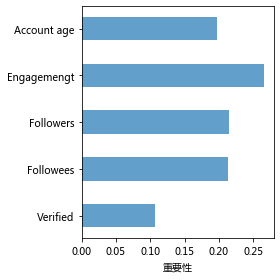

In [77]:
verified = du[0][1]
followees = du[1][1]
followers = du[2][1]
engagemengt = du[3][1]
account_age = du[4][1]
y = [verified,followees,followers,engagemengt,account_age]
x = [1,2,3,4,5]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Verified",'Followees','Followers','Engagemengt','Account age'],alpha=0.7,height=0.5)
plt.xlabel("重要性")
axes = plt.gca()
#axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("用户特征重要性（决策树）.png",dpi=300)
plt.show()

In [78]:
X = df[['verified_list', 'num_followees_list',
       'num_followers_list', 'test_engagemengt', 'account_age_list']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=35,random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
score_r

0.6815074819878071

In [79]:
ru = [*zip(X,rfc.feature_importances_)]
ru

[('verified_list', 0.038048538450227445),
 ('num_followees_list', 0.23211580848765756),
 ('num_followers_list', 0.2391960444968376),
 ('test_engagemengt', 0.2685536195506411),
 ('account_age_list', 0.22208598901463625)]

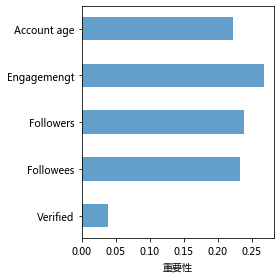

In [80]:
verified = ru[0][1]
followees = ru[1][1]
followers = ru[2][1]
engagemengt = ru[3][1]
account_age = ru[4][1]
y = [verified,followees,followers,engagemengt,account_age]
x = [1,2,3,4,5]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Verified",'Followees','Followers','Engagemengt','Account age'],alpha=0.7,height=0.5)
plt.xlabel("重要性")
axes = plt.gca()
#axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("用户特征重要性（随机森林）.png",dpi=300)
plt.show()

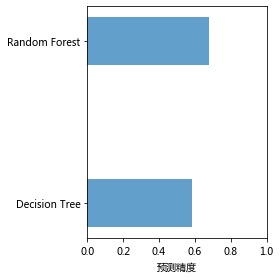

In [81]:
y = [score,score_r]
x = [1,2]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Decision Tree","Random Forest"],alpha=0.7,height=0.3)
plt.xlabel("预测精度")
axes = plt.gca()
axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("用户特征预测精度.png",dpi=300)
plt.show()

In [92]:
df_e = pd.read_excel('emotion_part_2.xlsx')
df_e.columns

Index(['07,293,202,206,199,4252,224,549,215,411,631,455,599,212,0,562,271,475,452,102,126,2449,1045,151,1323,',
       'Unnamed: 0', 'raw_id', 'tid', 'rumoid', 'virality', 'verified ',
       'veracity (F=0, T=1)', 'followees', 'engagement', 'followers',
       'accountage', 'depth2uu', 'uu2time', 'depth', 'unique_users',
       'depth2breadth', 'rumor_category', 'max_breadth', 'start_date', 'size',
       'sadness', 'anticipation', 'disgust', 'surprise', 'anger', 'joy',
       'fear', 'trust', 'misc'],
      dtype='object')

In [94]:
df_e['test_engagemengt']=''
test_engagemengt = df_e['test_engagemengt']
for i in range (0,22155):
    try:
        test_engagemengt[i] = float(df_e['engagement'][i])
    except Exception as e:
        test_engagemengt[i] = 0

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [95]:
#加入用户情感
X = df_e[['verified ','followees', 'test_engagemengt',
       'followers', 'accountage','sadness', 'anticipation', 'disgust', 'surprise',
       'anger', 'joy', 'fear', 'trust', 'misc']]
y = df_e['size']

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.7, test_size = 0.3)

model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)

y_pred = model.predict(X2)
ls = r2_score(y2, y_pred)
ls

0.0067779278462676285

In [111]:
X = df_e[['verified ','followees', 'test_engagemengt',
       'followers', 'accountage','sadness', 'anticipation', 'disgust', 'surprise',
       'anger', 'joy', 'fear', 'trust', 'misc']]
y = df_e['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.2065593500827441

In [110]:
X = df_e[['verified ','followees', 'test_engagemengt',
       'followers', 'accountage']]
y = df_e['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
score2 = clf.score(Xtest,Ytest)
score2

0.22370994433579058

In [101]:
du = [*zip(X,clf.feature_importances_)]
du

[('verified ', 0.16678390045032593),
 ('followees', 0.10951753353132045),
 ('test_engagemengt', 0.08990711281356895),
 ('followers', 0.08863688113705459),
 ('accountage', 0.07959476269616202),
 ('sadness', 0.05208489992185968),
 ('anticipation', 0.04935528262911528),
 ('disgust', 0.05851837754004953),
 ('surprise', 0.06386724885668121),
 ('anger', 0.06226815347156104),
 ('joy', 0.053952276449769215),
 ('fear', 0.06474212121298441),
 ('trust', 0.06060074158912185),
 ('misc', 0.00017070770042574491)]

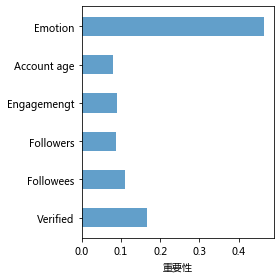

In [103]:
verified = du[0][1]
followees = du[1][1]
followers = du[3][1]
engagemengt = du[2][1]
account_age = du[4][1]
emotion  = 0
for i in range(5,14):
    emotion+=du[i][1]

y = [verified,followees,followers,engagemengt,account_age,emotion]
x = [1,2,3,4,5,6]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Verified",'Followees','Followers','Engagemengt','Account age','Emotion'],alpha=0.7,height=0.5)
plt.xlabel("重要性")
axes = plt.gca()
#axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("用户特征+情感（决策树）.png",dpi=300)
plt.show()

In [104]:
X = df_e[['verified ','followees', 'test_engagemengt',
       'followers', 'accountage','sadness', 'anticipation', 'disgust', 'surprise',
       'anger', 'joy', 'fear', 'trust', 'misc']]
y = df_e['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=35,random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
score_r

0.2804272604182338

In [112]:
X = df_e[['verified ','followees', 'test_engagemengt',
       'followers', 'accountage']]
y = df_e['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=35,random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
score_r2 = rfc.score(Xtest,Ytest)
score_r2

0.28148036708289453

In [105]:
ru = [*zip(X,rfc.feature_importances_)]
ru

[('verified ', 0.028163669843879694),
 ('followees', 0.10074545252509319),
 ('test_engagemengt', 0.1011801954515507),
 ('followers', 0.09412736692525962),
 ('accountage', 0.0930244722197596),
 ('sadness', 0.07017040188830896),
 ('anticipation', 0.07456717322925879),
 ('disgust', 0.07613144948250039),
 ('surprise', 0.07663727017377348),
 ('anger', 0.07535031493226427),
 ('joy', 0.06732454479990554),
 ('fear', 0.07137703688990485),
 ('trust', 0.07055649030493003),
 ('misc', 0.0006441613336108694)]

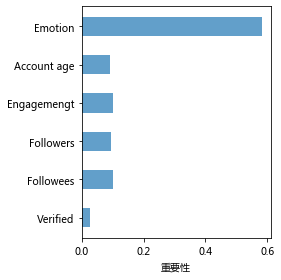

In [107]:
verified = ru[0][1]
followees = ru[1][1]
followers = ru[3][1]
engagemengt = ru[2][1]
account_age = ru[4][1]
emotion  = 0
for i in range(5,14):
    emotion+=ru[i][1]

y = [verified,followees,followers,engagemengt,account_age,emotion]
x = [1,2,3,4,5,6]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Verified",'Followees','Followers','Engagemengt','Account age','Emotion'],alpha=0.7,height=0.5)
plt.xlabel("重要性")
axes = plt.gca()
#axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("用户特征+情绪（随机森林）.png",dpi=300)
plt.show()

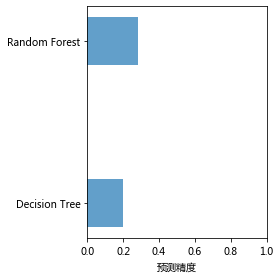

In [108]:
y = [score,score_r]
x = [1,2]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Decision Tree","Random Forest"],alpha=0.7,height=0.3)
plt.xlabel("预测精度")
axes = plt.gca()
axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("用户特征预测精度+情绪.png",dpi=300)
plt.show()

In [7]:
df.columns

Index(['Unnamed: 0', 'raw_id', 'tid', 'rumor_id', 'virality', 'verified_list',
       'veracity (0=0, 1=1, 2=2)', 'num_followees_list', 'num_followers_list',
       'engagement_list', 'account_age_list', 'depth2time', 'depth2uu',
       'depth2breadth', 'uu2time', 'depth', 'unique_users', 'max_breadth',
       'start_date', 'date', 'size', 'Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'sum_depth2uu', 'sum_depth2time', 'sum_depth2breadth', 'sum_uu2time',
       'max_depthtime', 'max_uutime', 'test_engagemengt'],
      dtype='object')

In [82]:
#content feature
X = df[['Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','veracity (0=0, 1=1, 2=2)']]
y = df['size']

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.7, test_size = 0.3)

model = LinearRegression(fit_intercept=True)
model.fit(X1, y1)

y_pred = model.predict(X2)
cs1 = r2_score(y2, y_pred)
cs1

0.0007527729266106897

In [83]:
X = df[['Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','veracity (0=0, 1=1, 2=2)']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=0
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
cs2 = clf.score(Xtest,Ytest)
cs2

0.6695521363912275

In [84]:
dt = [*zip(X,clf.feature_importances_)]
dt

[('Business', 0.019051292885348566),
 ('Politics', 0.16150848702898327),
 ('Entertainment', 0.005347271863851879),
 ('NaturalDisasters', 0.0033868023493094468),
 ('Science/Nature/Tech/Food/Health', 0.018253774782487568),
 ('ViralPhotos/Stories/UrbanLegends', 0.015996983337236884),
 ('War/Terrorism/Shootings', 0.057274770326068744),
 ('dawn', 0.03449740645964074),
 ('morning', 0.012649614433403697),
 ('noon', 0.02085094330283239),
 ('afternoon', 0.047624890742173416),
 ('evening', 0.05143000871887711),
 ('midnight', 0.04622016483300203),
 ('Monday', 0.04842807946700989),
 ('Tuesday', 0.049772652876630886),
 ('Wednesday', 0.05038722475924822),
 ('Thursday', 0.05462435787890849),
 ('Friday', 0.054949437478311915),
 ('Saturday', 0.0435736114074212),
 ('Sunday', 0.042957151820453336),
 ('veracity (0=0, 1=1, 2=2)', 0.16121507324880027)]

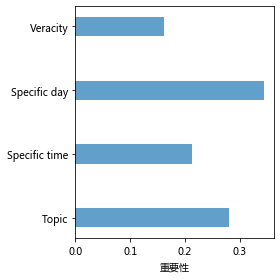

In [115]:
topic = 0
for i in range(0,7):
    topic += dt[i][1]
time = 0
for i in range(7,13):
    time += dt[i][1]
day = 0
for i in range(13,20):
    day += dt[i][1]
veracity = dt[20][1]

y = [topic,time,day,veracity]
x = [1,2,3,4]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Topic","Specific time",'Specific day','Veracity'],alpha=0.7,height=0.3)
plt.xlabel("重要性")
axes = plt.gca()
#axes.set_xlim([0,1])
plt.tight_layout()
#plt.savefig("内容特征重要性（决策树）.png",dpi=300)
plt.show()

In [116]:
day

0.344692515687984

In [86]:
X = df[['Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','veracity (0=0, 1=1, 2=2)']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=35,random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
cs3 = rfc.score(Xtest,Ytest)
cs3

0.6693146129687788

In [87]:
rf = [*zip(X,rfc.feature_importances_)]
rf

[('Business', 0.0393673665841345),
 ('Politics', 0.26218051912577617),
 ('Entertainment', 0.02045718165925524),
 ('NaturalDisasters', 0.007193450502397793),
 ('Science/Nature/Tech/Food/Health', 0.06891404899092639),
 ('ViralPhotos/Stories/UrbanLegends', 0.09583989774385963),
 ('War/Terrorism/Shootings', 0.059429401960076726),
 ('dawn', 0.011124484201466694),
 ('morning', 0.015084887397947968),
 ('noon', 0.013198807966735311),
 ('afternoon', 0.013829079989446469),
 ('evening', 0.014441026957210551),
 ('midnight', 0.01296639903175623),
 ('Monday', 0.011384381639838641),
 ('Tuesday', 0.02060981957663087),
 ('Wednesday', 0.013037542692294523),
 ('Thursday', 0.014948321290933785),
 ('Friday', 0.011937879208382823),
 ('Saturday', 0.013903916607411578),
 ('Sunday', 0.012574475765075652),
 ('veracity (0=0, 1=1, 2=2)', 0.26757711110844246)]

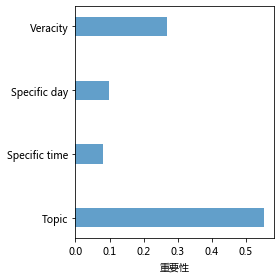

In [88]:
topic = 0
for i in range(0,7):
    topic += rf[i][1]
time = 0
for i in range(7,13):
    time += rf[i][1]
day = 0
for i in range(13,20):
    day += rf[i][1]
veracity = rf[20][1]

y = [topic,time,day,veracity]
x = [1,2,3,4]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Topic","Specific time",'Specific day','Veracity'],alpha=0.7,height=0.3)
plt.xlabel("重要性")
axes = plt.gca()
#axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("内容特征重要性（随机森林）.png",dpi=300)
plt.show()

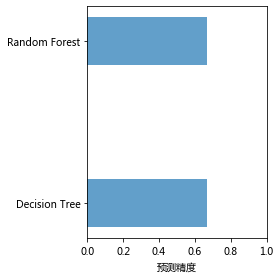

In [89]:
y = [cs2,cs3]
x = [1,2]
fig = plt.figure(figsize=(4,4))
plt.barh(x,y,align="center",tick_label=["Decision Tree","Random Forest"],alpha=0.7,height=0.3)
plt.xlabel("预测精度")
axes = plt.gca()
axes.set_xlim([0,1])
plt.tight_layout()
plt.savefig("内容特征预测精度.png",dpi=300)
plt.show()

In [120]:
#综合用户、内容特征
X = df[['verified_list', 'num_followees_list',
       'num_followers_list', 'test_engagemengt', 'account_age_list','Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','veracity (0=0, 1=1, 2=2)']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=30
                                 #,splitter = 'random'
                                  #,max_depth = 8
                                  #,min_samples_leaf = 0.05
                                  #,min_samples_split = 0.05
                                  #,max_features = 10
                                  )
clf = clf.fit(Xtrain,Ytrain)
csa = clf.score(Xtest,Ytest)
csa

0.5887149982845531

In [121]:
dt = [*zip(X,clf.feature_importances_)]
dt

[('verified_list', 0.10012392993517508),
 ('num_followees_list', 0.1492131980653897),
 ('num_followers_list', 0.1628618903171034),
 ('test_engagemengt', 0.21283522049025086),
 ('account_age_list', 0.15955293512348417),
 ('Business', 0.003620056839624733),
 ('Politics', 0.02661192515066802),
 ('Entertainment', 0.0041460357884835495),
 ('NaturalDisasters', 0.0011780231613727496),
 ('Science/Nature/Tech/Food/Health', 0.0057509999450706725),
 ('ViralPhotos/Stories/UrbanLegends', 0.005226808517148123),
 ('War/Terrorism/Shootings', 0.010071307457759538),
 ('dawn', 0.011490847587643894),
 ('morning', 0.007057411011743183),
 ('noon', 0.009430206079047028),
 ('afternoon', 0.011520212545081818),
 ('evening', 0.011937028414512491),
 ('midnight', 0.012843460909295197),
 ('Monday', 0.008508833512717778),
 ('Tuesday', 0.010347620476488205),
 ('Wednesday', 0.011356964737807472),
 ('Thursday', 0.010244928814679692),
 ('Friday', 0.010835455370399089),
 ('Saturday', 0.010143930857449378),
 ('Sunday', 0.

In [4]:
#建议别跑
X = df[['verified_list', 'num_followees_list',
       'num_followers_list', 'test_engagemengt', 'account_age_list','Business', 'Politics', 'Entertainment',
       'NaturalDisasters', 'Science/Nature/Tech/Food/Health',
       'ViralPhotos/Stories/UrbanLegends', 'War/Terrorism/Shootings', 'dawn',
       'morning', 'noon', 'afternoon', 'evening', 'midnight', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','veracity (0=0, 1=1, 2=2)']]
y = df['size']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=50,random_state=30)
rfc = rfc.fit(Xtrain,Ytrain)
csar = rfc.score(Xtest,Ytest)
csar

0.6868913462299755